In [58]:
#import all the imortant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [59]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
#import dataset
df=pd.read_csv("/content/drive/MyDrive/wine-new.csv")

In [61]:
#featues
df.columns

Index(['class', 'alcohol', ' malic_acid', ' ash', ' alcalinity_of_ash',
       ' magnesium', ' total_phenols', ' flavanoids', ' nonflavanoid_phenols',
       ' proanthocyanins', ' color_intensity', ' hue',
       ' od280/od315_of_diluted_wines', ' proline'],
      dtype='object')

In [62]:
df.shape

(178, 14)

In [63]:
#to remove the space from the columns name use str method
df.columns=df.columns.str.strip()

In [64]:
df.columns

Index(['class', 'alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash',
       'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

In [65]:
#data cleaning 
df.isnull().sum()

class                           0
alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       3
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             2
od280/od315_of_diluted_wines    7
proline                         0
dtype: int64

In [66]:
#to fill the values with prevois values
df.fillna(method='pad',inplace=True)

In [67]:
#to fill the labels which is missing use semisupervied learning

In [69]:
#cleaning by the outliers 
df.describe()

,class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.511236,2.295112,2.029270,0.361854,1.590899,5.058090,0.957393,2.628652,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.125842,0.625851,0.998859,0.124453,0.572359,2.318286,0.228500,0.722159,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.820000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,106.750000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.200000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


## if the diff bewtweeen mean and 50% is more then we can called them as outliers

In [70]:
#to remove the outlierrs using the isolation forest


In [71]:
x=df.drop('class',axis=1)
y=df['class']

In [72]:
x.shape

(178, 13)

In [73]:
#outiers detecction 
from sklearn.ensemble import IsolationForest
#contamination means data mhadle top che kiti outliers kaddaych aahet 0.1 means top 10%
iso=IsolationForest(contamination=0.1)
clean=iso.fit_predict(x,y)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


In [74]:
clean # -1 means outliers 

array([ 1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1])

In [76]:
#now we have to use boolean entry extract the outliers 
#outliers here are rows

In [77]:
#outliers
x[clean==-1]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
13,14.75,1.73,2.39,11.4,91.0,3.10,3.69,0.43,2.81,5.40,1.25,2.73,1150
14,14.38,1.87,2.38,12.0,102.0,3.30,3.64,0.29,2.96,7.50,1.20,3.00,1547
25,13.05,2.05,3.22,25.0,124.0,2.63,2.68,0.47,1.92,3.58,1.13,3.20,830
50,13.05,1.73,2.04,12.4,92.0,2.72,3.27,0.17,2.91,7.20,1.12,2.91,1150
59,12.37,0.94,1.36,10.6,88.0,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520
69,12.21,1.19,1.75,16.8,151.0,1.85,1.28,0.14,2.50,2.85,1.28,3.07,718
73,12.99,1.67,2.60,30.0,139.0,3.30,2.89,0.21,1.96,3.35,1.31,3.50,985
78,12.33,0.99,1.95,14.8,136.0,1.90,1.85,0.35,2.76,3.40,1.06,2.31,750
95,12.47,1.52,2.20,19.0,162.0,2.50,2.27,0.32,3.28,2.60,1.16,2.63,937


In [78]:
#without outliers values
x=x[clean==1]
y=y[clean==1]

In [79]:
x.shape

(160, 13)

Sns pairplot la hue ha nehmi dataset mhadlach asla pahije 

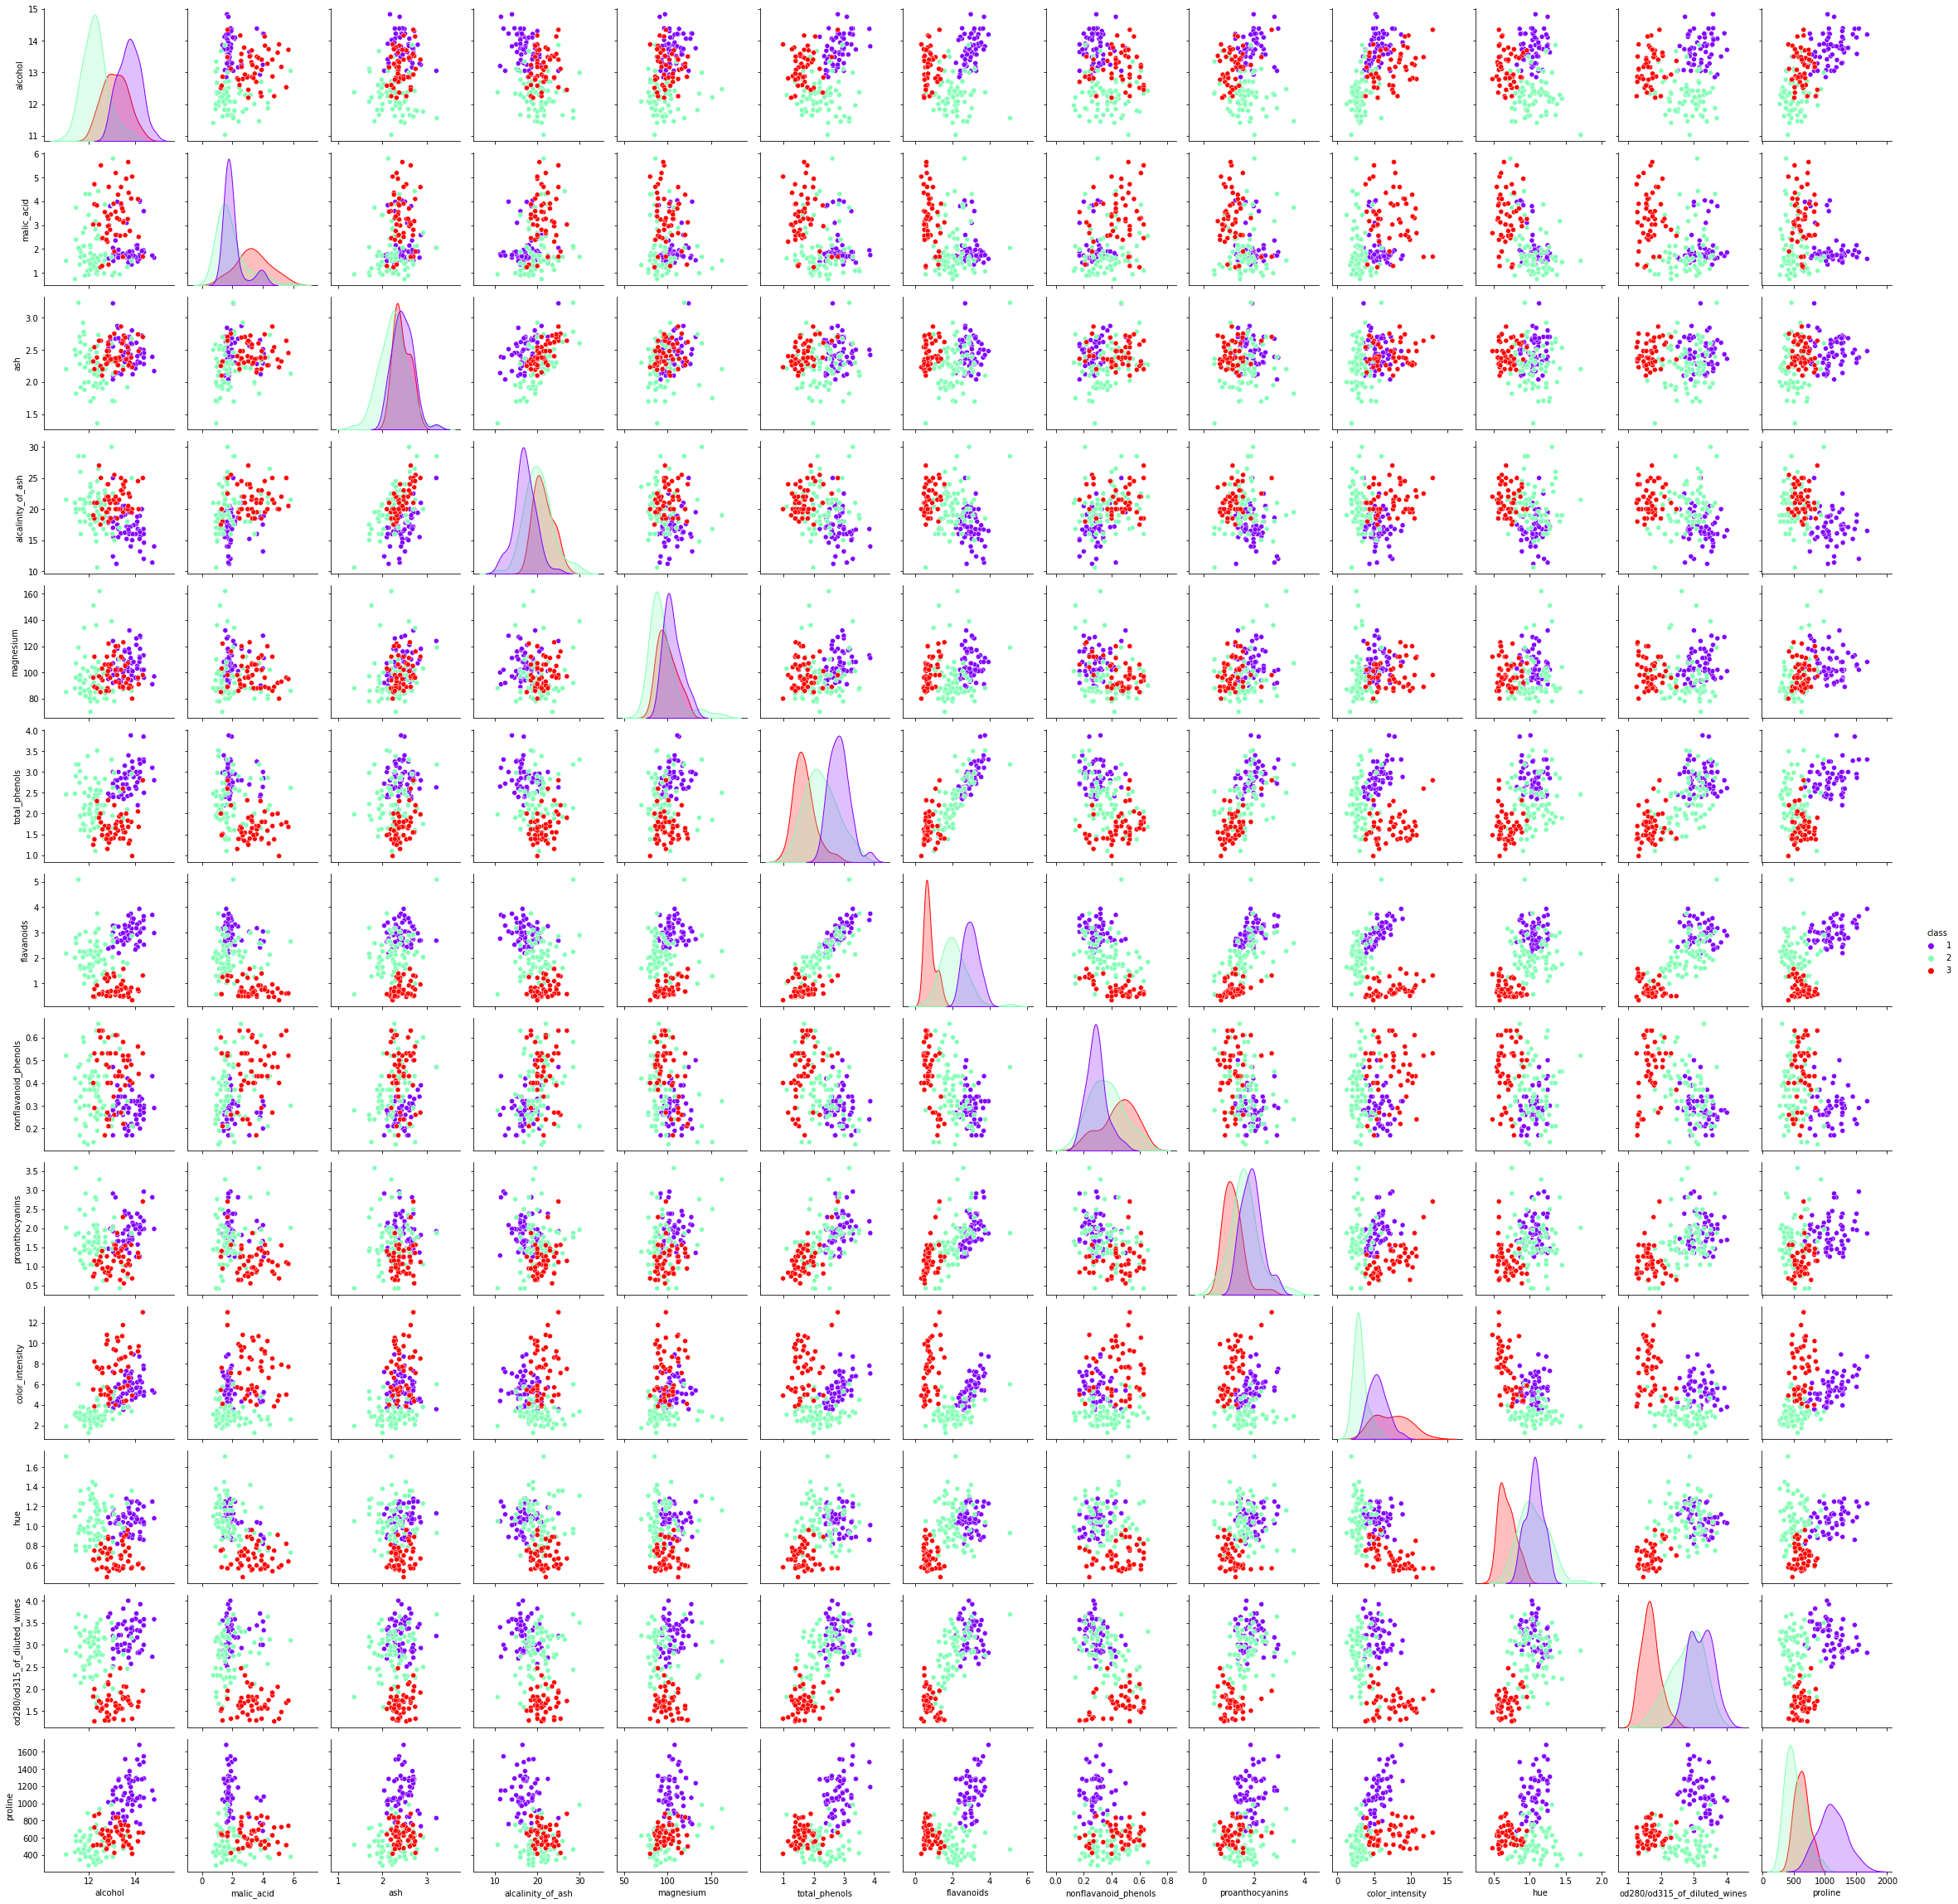

In [80]:
#Explore the data
sns.pairplot(df,diag_kind='kde',hue='class',palette='rainbow')

In [81]:
#feature selecction
#remove varince threshhold to remove constat features



In [82]:
from sklearn.feature_selection import VarianceThreshold
vt=VarianceThreshold(threshold=0)

In [83]:

vt.fit(x)

VarianceThreshold(threshold=0)

In [84]:
#all true means there is no constant features are there 
vt.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [85]:
#to remove the duplicated feautres using transform  method

In [86]:
xt=x.T

In [87]:
xt.shape

(13, 160)

In [88]:
xt.duplicated()

alcohol                         False
malic_acid                      False
ash                             False
alcalinity_of_ash               False
magnesium                       False
total_phenols                   False
flavanoids                      False
nonflavanoid_phenols            False
proanthocyanins                 False
color_intensity                 False
hue                             False
od280/od315_of_diluted_wines    False
proline                         False
dtype: bool

In [89]:
x.corr()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
alcohol,1.000000,0.126403,0.211319,-0.328836,0.413156,0.321286,0.289325,-0.198689,0.215671,0.527971,-0.026608,0.148800,0.648791
malic_acid,0.126403,1.000000,0.167895,0.295377,0.055511,-0.345521,-0.445088,0.304429,-0.236730,0.315228,-0.572167,-0.390407,-0.161742
ash,0.211319,0.167895,1.000000,0.339021,0.393962,0.085857,0.036037,0.103685,0.038747,0.216570,-0.044315,-0.045996,0.271401
alcalinity_of_ash,-0.328836,0.295377,0.339021,1.000000,-0.198491,-0.437218,-0.468652,0.357731,-0.238535,-0.009036,-0.301722,-0.401196,-0.457656
magnesium,0.413156,0.055511,0.393962,-0.198491,1.000000,0.200712,0.169546,-0.254863,0.107672,0.346211,-0.060390,0.004204,0.417467
total_phenols,0.321286,-0.345521,0.085857,-0.437218,0.200712,1.000000,0.878068,-0.488048,0.631599,-0.119060,0.484886,0.709497,0.489517
flavanoids,0.289325,-0.445088,0.036037,-0.468652,0.169546,0.878068,1.000000,-0.590858,0.728186,-0.215793,0.591359,0.791489,0.497927
nonflavanoid_phenols,-0.198689,0.304429,0.103685,0.357731,-0.254863,-0.488048,-0.590858,1.000000,-0.413028,0.103487,-0.276457,-0.509892,-0.303639
proanthocyanins,0.215671,-0.236730,0.038747,-0.238535,0.107672,0.631599,0.728186,-0.413028,1.000000,-0.084109,0.347633,0.593778,0.343825
color_intensity,0.527971,0.315228,0.216570,-0.009036,0.346211,-0.119060,-0.215793,0.103487,-0.084109,1.000000,-0.518262,-0.452203,0.325679


In [90]:
#to remove the correlated features we hav eto delete som columns
#so instead of deleting od20/od and total_phenols delete falvnoids
x.corrwith(x['flavanoids'])

alcohol                         0.289325
malic_acid                     -0.445088
ash                             0.036037
alcalinity_of_ash              -0.468652
magnesium                       0.169546
total_phenols                   0.878068
flavanoids                      1.000000
nonflavanoid_phenols           -0.590858
proanthocyanins                 0.728186
color_intensity                -0.215793
hue                             0.591359
od280/od315_of_diluted_wines    0.791489
proline                         0.497927
dtype: float64

In [91]:
x.drop('flavanoids',axis=1,inplace=True)

In [92]:
x

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100.0,2.65,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101.0,2.80,0.30,2.81,5.68,1.03,3.17,1185
4,13.24,2.59,2.87,21.0,118.0,2.80,0.39,1.82,4.32,1.04,2.93,735
5,14.20,1.76,2.45,15.2,112.0,3.27,0.34,1.97,6.75,1.05,2.85,1450
...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102.0,1.80,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120.0,1.59,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120.0,1.65,0.53,1.46,9.30,0.60,1.62,840


In [93]:
x.shape

(160, 12)

In [94]:
#Wrapper method of feature selection 
from sklearn.tree import DecisionTreeClassifier


In [95]:
dt=DecisionTreeClassifier(random_state=0)

In [96]:
from sklearn.feature_selection import RFE
rfe=RFE(dt,n_features_to_select=5)

In [97]:
rfe.fit(x,y)

RFE(estimator=DecisionTreeClassifier(random_state=0), n_features_to_select=5)

In [99]:
#to get the name of features
rfe.get_support()

array([ True, False, False, False, False,  True, False, False, False,
        True,  True,  True])

In [100]:
x.iloc[:,rfe.get_support()]

,alcohol,total_phenols,hue,od280/od315_of_diluted_wines,proline
0,14.23,2.80,1.04,3.92,1065
1,13.20,2.65,1.05,3.40,1050
2,13.16,2.80,1.03,3.17,1185
4,13.24,2.80,1.04,2.93,735
5,14.20,3.27,1.05,2.85,1450
...,...,...,...,...,...
173,13.71,1.68,0.64,1.74,740
174,13.40,1.80,0.70,1.56,750
175,13.27,1.59,0.59,1.56,835
176,13.17,1.65,0.60,1.62,840


In [101]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


In [102]:
skb=SelectKBest(chi2,k=5)

In [103]:
skb.fit(x,y)

SelectKBest(k=5, score_func=<function chi2 at 0x7f17a3e30950>)

In [104]:
x.iloc[:,skb.get_support()]

,malic_acid,alcalinity_of_ash,magnesium,color_intensity,proline
0,1.71,15.6,127.0,5.64,1065
1,1.78,11.2,100.0,4.38,1050
2,2.36,18.6,101.0,5.68,1185
4,2.59,21.0,118.0,4.32,735
5,1.76,15.2,112.0,6.75,1450
...,...,...,...,...,...
173,5.65,20.5,95.0,7.70,740
174,3.91,23.0,102.0,7.30,750
175,4.28,20.0,120.0,10.20,835
176,2.59,20.0,120.0,9.30,840


In [105]:
x=x.iloc[:,skb.get_support()]

In [106]:
x.shape

(160, 5)

In [107]:
#check the balance the of the data
y.value_counts()

2    62
1    54
3    44
Name: class, dtype: int64

In [108]:
#lets balance thee data

from imblearn.over_sampling import RandomOverSampler


In [109]:
ros=RandomOverSampler(random_state=0)

In [110]:
x_res,y_res=ros.fit_resample(x,y)

In [111]:
y_res.value_counts()

1    62
2    62
3    62
Name: class, dtype: int64

In [112]:
#normalization

In [114]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x_res)

In [115]:
#cross validation 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y_res,random_state=0,test_size=0.25,stratify=y_res)

In [116]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)


In [117]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.9361702127659575

In [118]:
params={
    'n_estimators':[10,20,50,100],
    'criterion':['gini','entropy'],
    'random_state':[0,1,2,3,4,5]

}

In [120]:
#hyperparametr testing
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(estimator=clf,param_grid=params,cv=5,scoring='accuracy')

In [121]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [10, 20, 50, 100],
                         'random_state': [0, 1, 2, 3, 4, 5]},
             scoring='accuracy')

In [123]:
grid.best_estimator_

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=5)

In [124]:
clf_new=grid.best_estimator_
y_pred=clf_new.predict(x_test)

In [125]:
accuracy_score(y_test,y_pred)

0.9361702127659575

In [127]:
from sklearn.ensemble import ExtraTreesClassifier
clf=ExtraTreesClassifier()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

accuracy_score(y_test,y_pred)

0.9574468085106383

In [128]:
from sklearn.svm import SVC
params={
    'kernel':['linear','rbf','poly'],
    'random_state':[1,2,3,4,5]
}
clf=SVC()
grid=GridSearchCV(estimator=clf,param_grid=params,cv=5,scoring='accuracy')
grid.fit(x_train,y_train)
grid.best_estimator_
clf_new=grid.best_estimator_
y_pred=clf_new.predict(x_test)
accuracy_score(y_test,y_pred)

0.9361702127659575

In [129]:
#serialization
import joblib

In [ ]:
joblib.dump(grid,'classifier_model')

In [ ]:
joblib.dump(scaler,'scaler.model')